In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/merged_data.csv')

In [8]:
data

,road,id,model_type,condition,name,lat,lon,length,intersects_with
0,N1,1,sourcesink,NaN,Start of Road after Jatrabari Flyover infront...,23.706028,90.443333,0.8140,NaN
1,N1,2,link,NaN,link 2,23.702917,90.450417,0.0080,NaN
2,N1,3,link,NaN,link 3,23.702778,90.450472,0.1780,NaN
3,N1,4,link,NaN,link 4,23.702139,90.451972,1.0000,NaN
4,N1,5,bridge,A,. id 5,23.697889,90.460583,0.0113,NaN
...,...,...,...,...,...,...,...,...,...
4709,N208,4710,link,NaN,link 4710,24.861528,91.881860,0.0850,NaN
4710,N208,4711,link,NaN,link 4711,24.861889,91.881027,1.0000,NaN
4711,N208,4712,link,NaN,link 4712,24.869499,91.876027,0.9000,NaN
4712,N208,4713,bridge,B,KADAM TALI BOX CULVERT id 4713,24.877555,91.875360,0.0056,NaN


In [10]:
data[data['road'].str.contains('N105', na=False)]

,road,id,model_type,condition,name,lat,lon,length,intersects_with
2352,N105,2353,intersection,NaN,intersection of N105 with N1,23.690416,90.546611,1.00000,35.0
2353,N105,2354,bridge,C,MODONPUR id 2354,23.698416,90.551056,0.01280,NaN
2354,N105,2355,link,NaN,link 2355,23.698416,90.551056,0.12000,NaN
2355,N105,2356,bridge,A,MODONPUR COLLEGE id 2356,23.699305,90.551528,0.00625,NaN
2356,N105,2357,link,NaN,link 2357,23.699305,90.551528,0.93400,NaN
...,...,...,...,...,...,...,...,...,...
2496,N105,2497,link,NaN,link 2497,23.977638,90.372166,0.05600,NaN
2497,N105,2498,link,NaN,link 2498,23.977499,90.372638,0.78400,NaN
2498,N105,2499,link,NaN,link 2499,23.982638,90.366999,0.62200,NaN
2499,N105,2500,link,NaN,link 2500,23.986583,90.362500,0.60500,NaN


In [4]:
def create_graph(data):
    G = nx.Graph()
    
    # Add nodes with positions
    for idx, row in data.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), label=row['name'])
    
    # Add edges for sequential nodes within the same road
    roads = data.groupby('road')
    for road_name, group in roads:
        sorted_group = group.sort_values(by='id')  # Ensure nodes are added sequentially
        for i in range(len(sorted_group) - 1):
            G.add_edge(sorted_group.iloc[i]['id'], sorted_group.iloc[i + 1]['id'])
    
    # Handle intersections: connect the end of one road to the start of another if they have the same name in the description
    for idx, row in data.iterrows():
        if 'intersection' in row['model_type'].lower():
            print('I got here')
            G.add_edge(row['id'], row['intersects_with'])
            # # Find roads mentioned in the description
            # connected_roads = [r.strip() for r in row['name'].split('and')]
            # if len(connected_roads) == 2:
            #     road1, road2 = connected_roads
            #     # Find the nodes at the ends of these roads
            #     road1_nodes = data[(data['road'] == road1) & (data['model_type'] != 'intersection')]
            #     road2_nodes = data[(data['road'] == road2) & (data['model_type'] != 'intersection')]
            #     if not road1_nodes.empty and not road2_nodes.empty:
            #         road1_end_node = road1_nodes.iloc[-1]['id']
            #         road2_start_node = road2_nodes.iloc[0]['id']
            #         # Add edge between these nodes
            #         G.add_edge(road1_end_node, road2_start_node)
            #         print('added edge',road1_end_node, road2_start_node)
    return G


I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here


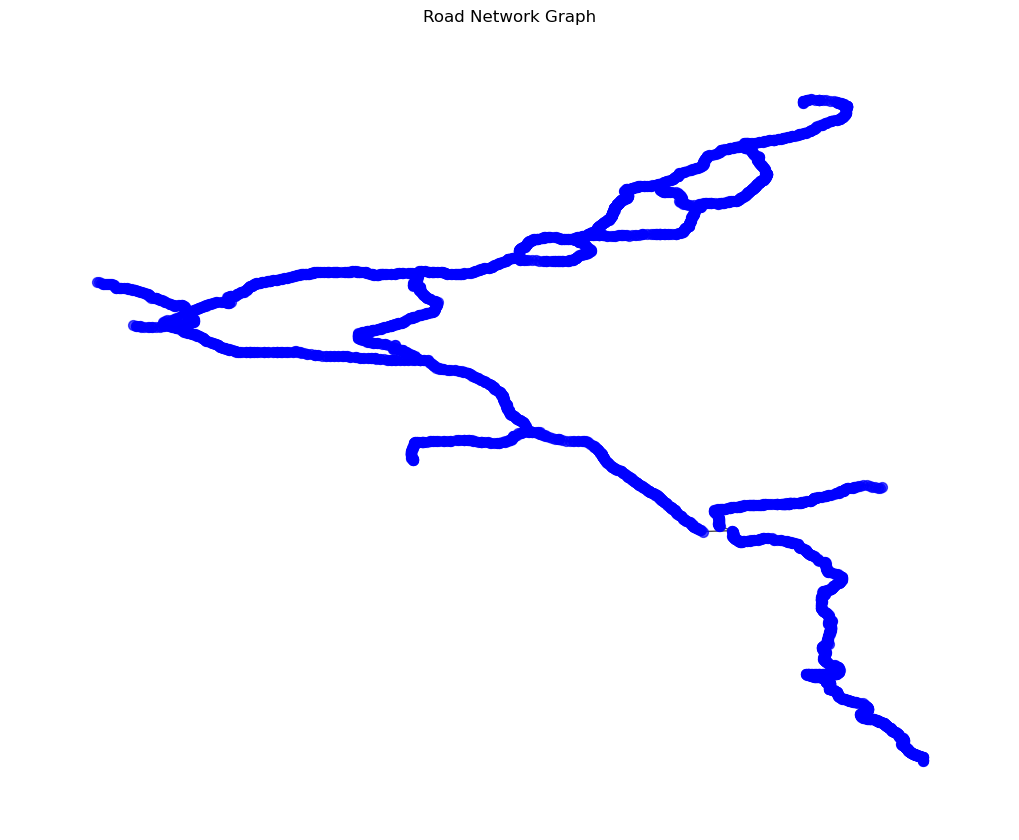

In [5]:
A = create_graph(data)
plt.figure(figsize=(10, 8))
pos = nx.get_node_attributes(A, 'pos')
labels = nx.get_node_attributes(A, 'label')
nx.draw(A, pos, node_size=50, with_labels=False, node_color='blue', alpha=0.7)
plt.title('Road Network Graph')
plt.show()

In [6]:

    G = nx.Graph()
    
    # Add nodes with positions
    for idx, row in data.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), label=row['name'])
    
    # Add edges for sequential nodes within the same road
    roads = data.groupby('road')
    for road_name, group in roads:
        sorted_group = group.sort_values(by='id')  # Ensure nodes are added sequentially
        for i in range(len(sorted_group) - 1):
            G.add_edge(sorted_group.iloc[i]['id'], sorted_group.iloc[i + 1]['id'])
    
    # Handle intersections: connect the end of one road to the start of another if they have the same name in the description
    for idx, row in data.iterrows():
        if 'intersection' in row['model_type'].lower():
            # Find roads mentioned in the description
            connected_roads = [r.strip() for r in row['name'].split('and')]
            if len(connected_roads) == 2:
                road1, road2 = connected_roads
                # Find the nodes at the ends of these roads
                road1_nodes = data[(data['road'] == road1) & (data['model_type'] != 'intersection')]
                road2_nodes = data[(data['road'] == road2) & (data['model_type'] != 'intersection')]
                if not road1_nodes.empty and not road2_nodes.empty:
                    road1_end_node = road1_nodes.iloc[-1]['id']
                    road2_start_node = road2_nodes.iloc[0]['id']
                    # Add edge between these nodes
                    G.add_edge(road1_end_node, road2_start_node)

In [6]:
G = create_graph(data)

I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here
I got here


In [9]:
G.edges(2353)

EdgeDataView([(2353, 2354), (2353, 35)])

In [8]:
null_length_indices = data[data['length'].isnull()].index
null_length_indices


Index([3037], dtype='int64')

In [9]:
data.iloc[3037]

road                                      N2
id                                      3038
model_type                            bridge
condition                                  A
name               Narayanpur Bridge id 3038
lat                                24.054778
lon                                90.922083
length                                   NaN
intersects_with                          NaN
Name: 3037, dtype: object